## Tarea 2 Cosmología
Benjamín Guerra Cuadra

In [1]:
import camb

# P4.

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [52]:
# Constantes

H0 = 67 #Km/s/Mpc
Omega_r0 = 10e-4
Omega_m0 = 0.3

Omega_lambda0 = 1 - Omega_r0 - Omega_m0

Omega_b = 0.022
Omega_cdm = 0.12

In [31]:
# Factores de escala

a_min = 1e-4
a_max = 1

In [32]:
# Números de onda
h = H0/100
k_values = np.array([1,5,20,200]) * H0 /3e5 # Convertimos a unidades de h/Mpc

In [35]:
from camb import model, initialpower
# Iniciamos CAMB

pars = camb.CAMBparams()
pars.set_cosmology(H0=H0, ombh2=Omega_b, omch2=Omega_cdm, mnu=0.06, omk=0, tau=0.06)
pars.set_dark_energy(w=-1)
pars.set_initial_power(initialpower.InitialPowerLaw(As=2e-9, ns=0.965))
pars.set_matter_power(redshifts=np.linspace(0, np.log10(1/a_min), 100), kmax=10)



Note: redshifts have been re-sorted (earliest first)


class: <CAMBparams>
 WantCls = True
 WantTransfer = True
 WantScalars = True
 WantTensors = False
 WantVectors = False
 WantDerivedParameters = True
 Want_cl_2D_array = True
 Want_CMB = True
 Want_CMB_lensing = True
 DoLensing = True
 NonLinear = NonLinear_none
 Transfer: <TransferParams>
   high_precision = True
   accurate_massive_neutrinos = False
   kmax = 10.0
   k_per_logint = 0
   PK_num_redshifts = 100
   PK_redshifts = [4.0, 3.95959595959596, 3.9191919191919196, 3.878787878787879, 3.8383838383838387, 3.7979797979797985, 3.757575757575758, ...]
 want_zstar = False
 want_zdrag = False
 min_l = 2
 max_l = 2500
 max_l_tensor = 600
 max_eta_k = 5000.0
 max_eta_k_tensor = 1200.0
 ombh2 = 0.022
 omch2 = 0.12
 omk = 0.0
 omnuh2 = 0.000644866570625114
 H0 = 67.0
 TCMB = 2.7255
 YHe = 0.24569492503497048
 num_nu_massless = 2.0293333333333337
 num_nu_massive = 1
 nu_mass_eigenstates = 1
 share_delta_neff = False
 nu_mass_degeneracies = [1.0146666666666666]
 nu_mass_fractions = [1.0]
 nu_

In [36]:
# Seteamos las perturbaciones
pars.NonLinear = model.NonLinear_none

#Resolvemos
results = camb.get_results(pars)

In [37]:
# Definimos un interpolador
PK = results.get_matter_power_interpolator(nonlinear=False, hubble_units=False, k_hunit=False)

In [38]:
# Definimos un rango de factores de escala
a_values = np.logspace(np.log10(a_min), np.log10(a_max), 200)
z_values = 1/a_values - 1  # Convertimos los factores a redshift

In [40]:
# Guardamos los crecimientos para cada k
growth_data = {}

for k in k_values:
    delta_m = []
    for z in z_values:
        # Calculamos el power spectrum para cada k y z
        power_spectrum = PK.P(z, k)
        delta_m.append(np.sqrt(power_spectrum))  
    
    # Normalizamos
    delta_m = np.array(delta_m)
    growth_data[k] = delta_m / delta_m[0]  

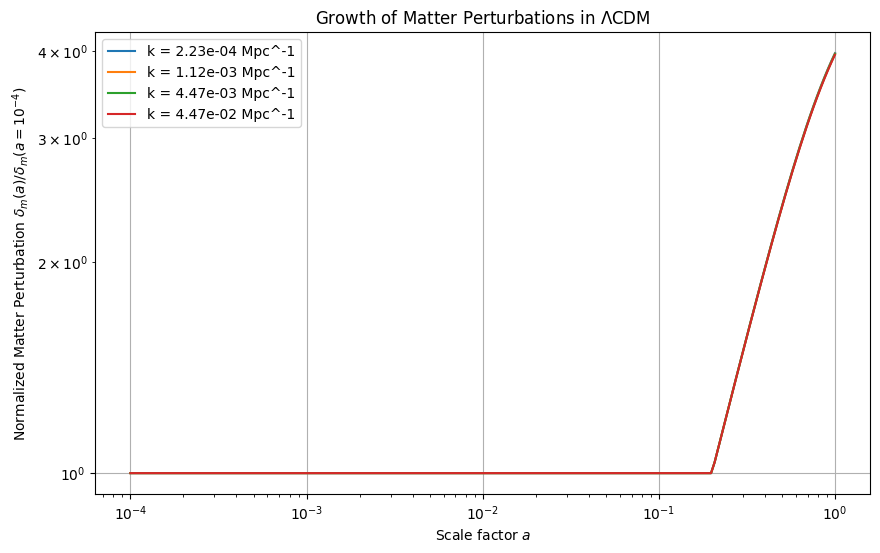

In [41]:
# Ploteamos los resultados
plt.figure(figsize=(10, 6))
for k in k_values:
    plt.plot(a_values, growth_data[k], label=f'k = {k:.2e} Mpc^-1')

plt.xlabel('Scale factor $a$')
plt.ylabel('Normalized Matter Perturbation $\\delta_m(a)/\\delta_m(a=10^{-4})$')
plt.xscale('log')
plt.yscale('log')
plt.title('Growth of Matter Perturbations in $\Lambda$CDM')
plt.legend()
plt.grid(True)
plt.show()

# P5.

In [47]:
#definimos las masas
mnu_massive = 0.06  # Masa neutrino en eV
mnu_massless = 0

# Valores de redshift y k
z_values = [0, 50, 100, 150, 200]  
k_values = np.logspace(-3, 1, 100)  

In [46]:
# Definimos el Power Spectrum en función de mnu
def get_matter_power_spectrum(mnu):
    pars = camb.CAMBparams()
    pars.set_cosmology(H0=H0, ombh2=Omega_b, omch2=Omega_cdm, mnu=mnu, omk=0, tau=0.06)
    pars.set_dark_energy(w=-1)
    pars.set_initial_power(initialpower.InitialPowerLaw(As=2e-9, ns=0.965))
    pars.set_matter_power(redshifts=z_values, kmax=10)
    pars.NonLinear = model.NonLinear_none  
    
    
    results = camb.get_results(pars)
    PK = results.get_matter_power_interpolator(nonlinear=False, hubble_units=False, k_hunit=True)
    
    # Calculamos el Power Spectra para cada z
    power_spectra = {}
    for z in z_values:
        power_spectra[z] = [PK.P(z, k) for k in k_values]
    return power_spectra

In [53]:
# Calculamos para el caso con o sin masa
power_spectra_massive = get_matter_power_spectrum(mnu=mnu_massive)  # With massive neutrinos
power_spectra_massless = get_matter_power_spectrum(mnu=mnu_massless)  # Without massive neutrinos


Note: redshifts have been re-sorted (earliest first)
Note: redshifts have been re-sorted (earliest first)


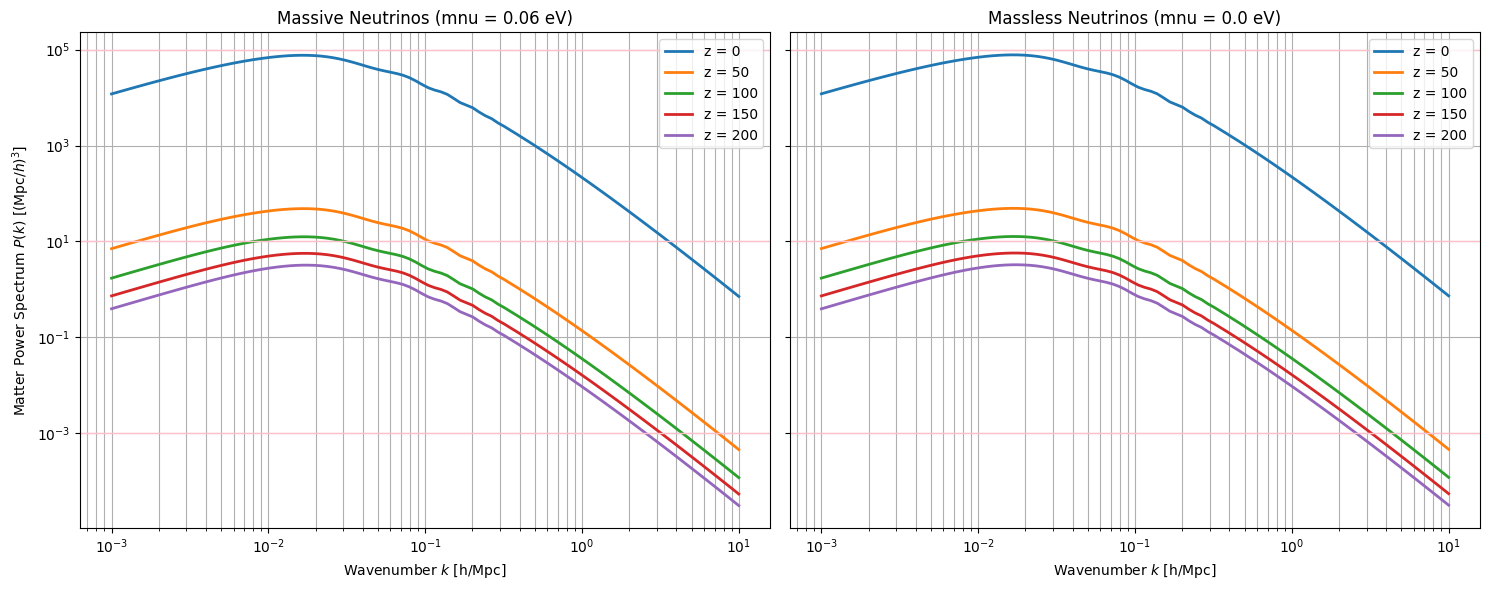

In [84]:
# Hacemos un subplot para comparar
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6), sharey=True)

# Subplot 1: Power spectrum con neutrinos masivos
for z in z_values:
    ax1.plot(k_values, power_spectra_massive[z], label=f'z = {z}', lw=2)
ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.set_xlabel('Wavenumber $k$ [h/Mpc]')
ax1.set_ylabel('Matter Power Spectrum $P(k)$ [$(\mathrm{Mpc}/h)^3$]')
ax1.set_title('Massive Neutrinos (mnu = 0.06 eV)')
ax1.legend()
ax1.grid(True, which='both')

# Subplot 2: Power spectrum con neutrinos sin masa
for z in z_values:
    ax2.plot(k_values, power_spectra_massless[z], label=f'z = {z}', lw=2)
ax2.set_xscale('log')
ax2.set_yscale('log')
ax2.set_xlabel('Wavenumber $k$ [h/Mpc]')
ax2.set_title('Massless Neutrinos (mnu = 0.0 eV)')
ax2.legend()
ax2.grid(True, which='both')

ax1.axhline(y=1e5, color='pink', linestyle='-', linewidth=1)  
ax2.axhline(y=1e5, color='pink', linestyle='-', linewidth=1)  

ax1.axhline(y=1e1, color='pink', linestyle='-', linewidth=1)  
ax2.axhline(y=1e1, color='pink', linestyle='-', linewidth=1)  

ax1.axhline(y=1e-3, color='pink', linestyle='-', linewidth=1)  
ax2.axhline(y=1e-3, color='pink', linestyle='-', linewidth=1)  


plt.tight_layout()
plt.show()


De estos gráficos, podemos apreciar que la diferencia entre neutrinos masivos y sin masa no es grande, ni cambia los comportamientos del Matter Power Spectrum, sin embargo, ambos gráficos sí son distintos en regiones de k mayores: los neutrinos masivos suponen una supresión en escalas pequeñas, debido a que su masa genera mayores complicaciones en la formacióin de pequeñas estructuras. Esto, además es mayormente obervable a redshift bajo, que supone un tiempo lo suficientemente largo para que la interacción haya tenido mayores consecuencias.            

# P6.

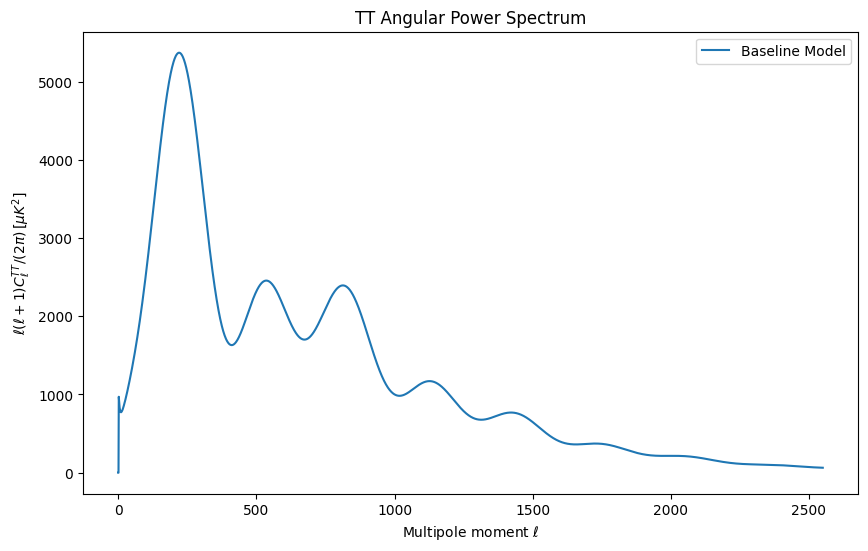

In [63]:
# Definimos una función para calcular el TT power spectrum para un set de parámetros
def compute_tt_spectrum(H0=H0, ombh2=Omega_b, omch2=Omega_cdm, tau=0.06, As=2e-9, ns=0.965):
    # Set up the CAMB parameters
    pars = camb.CAMBparams()
    pars.set_cosmology(H0=H0, ombh2=ombh2, omch2=omch2, tau=tau)
    pars.InitPower.set_params(As=As, ns=ns)
    pars.set_for_lmax(2500, lens_potential_accuracy=0)
    
    # Calculate the results for these parameters
    results = camb.get_results(pars)
    powers = results.get_cmb_power_spectra(pars, CMB_unit='muK')
    tt_spectrum = powers['total'][:, 0]  # TT power spectrum 
    
    return tt_spectrum, results

# Calculamos el caso base
tt_spectrum_baseline, results_baseline = compute_tt_spectrum()

# Ploteamos el spectrum
plt.figure(figsize=(10, 6))
ell = np.arange(len(tt_spectrum_baseline))
plt.plot(ell, tt_spectrum_baseline, label="Baseline Model")
plt.xlabel(r'Multipole moment $\ell$')
plt.ylabel(r'$\ell(\ell+1)C_\ell^{TT}/(2\pi) \, [\mu K^2]$')
plt.title("TT Angular Power Spectrum")
plt.legend()
plt.show()


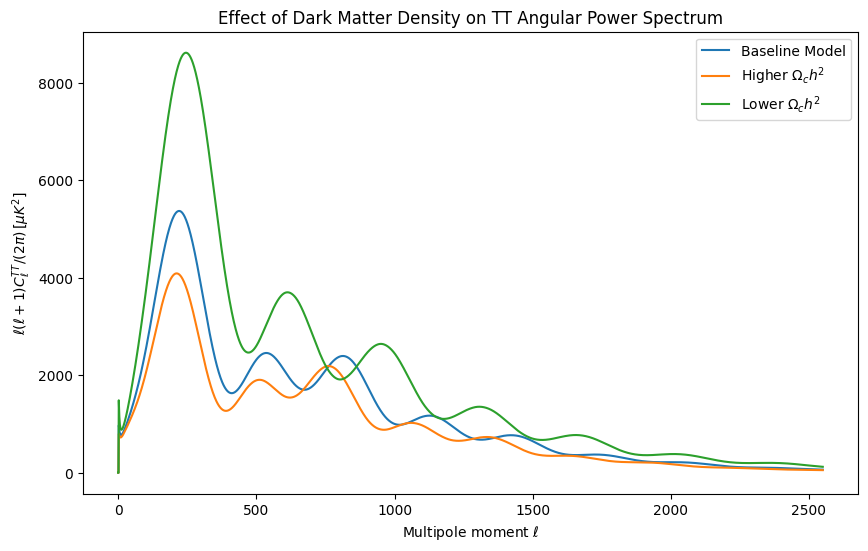

In [65]:
# Calculamos para distinto valores de CDM
tt_spectrum_high_dm, _ = compute_tt_spectrum(omch2=0.20)   
tt_spectrum_low_dm, _ = compute_tt_spectrum(omch2=0.04)    

# Ploteamos la comparación
plt.figure(figsize=(10, 6))
plt.plot(ell, tt_spectrum_baseline, label="Baseline Model")
plt.plot(ell, tt_spectrum_high_dm, label=r"Higher $\Omega_c h^2$")
plt.plot(ell, tt_spectrum_low_dm, label=r"Lower $\Omega_c h^2$")
plt.xlabel(r'Multipole moment $\ell$')
plt.ylabel(r'$\ell(\ell+1)C_\ell^{TT}/(2\pi) \, [\mu K^2]$')
plt.title("Effect of Dark Matter Density on TT Angular Power Spectrum")
plt.legend()
plt.show()


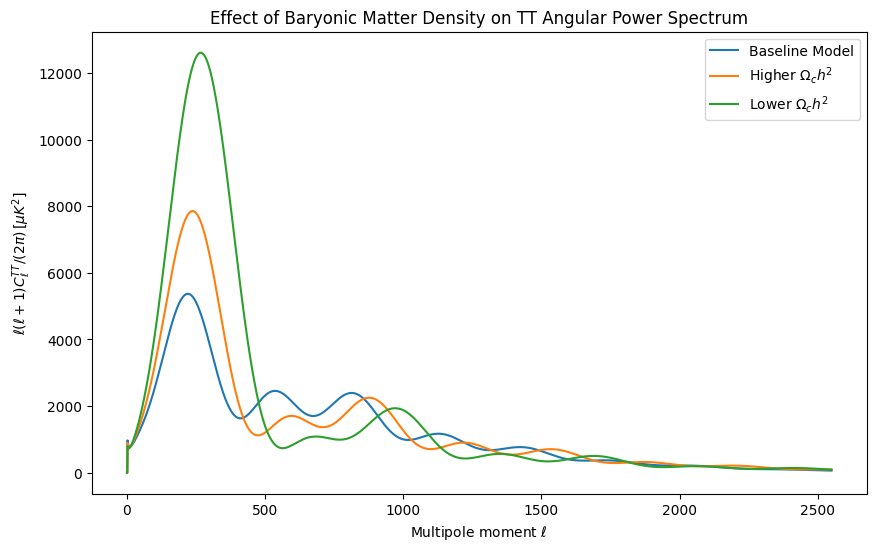

In [68]:
#Ploteamos para distintos valores de materia bariónica
tt_spectrum_high_dm, _ = compute_tt_spectrum(ombh2=0.05)   
tt_spectrum_low_dm, _ = compute_tt_spectrum(ombh2=0.1)    

# Ploteamos la comparación
plt.figure(figsize=(10, 6))
plt.plot(ell, tt_spectrum_baseline, label="Baseline Model")
plt.plot(ell, tt_spectrum_high_dm, label=r"Higher $\Omega_c h^2$")
plt.plot(ell, tt_spectrum_low_dm, label=r"Lower $\Omega_c h^2$")
plt.xlabel(r'Multipole moment $\ell$')
plt.ylabel(r'$\ell(\ell+1)C_\ell^{TT}/(2\pi) \, [\mu K^2]$')
plt.title("Effect of Baryonic Matter Density on TT Angular Power Spectrum")
plt.legend()
plt.show()

En ambas comparaciones, podemos observar que los peaks se encuentran desplazados, y aumentados/disminuidos en formas similares. Para ambos casos, menores densidades suponen un mayor primer peak en el espectro, lo que se relaciona a largas escalas del universo temprano, en donde aumentos de materia suponen mayores barreras potenciales que disminuyen los peaks de oscilaciones. A medida que aumentan los $l's$, podemos observar que los peaks crecen de manera distinta, debido a las diferencias en las interacciones de ambas materias post-recombinación, lo cual tiene sentido sabiendo que CDM no interactúa de ninguna otra manera que la gravedad, y la materia bariónica debe sufrir algún cambio en su comportamiento luego de este período. 